 ## Question 5:Prima Diabetes

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn import metrics,preprocessing

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statistics import mode

### Importing Dataset

In [49]:
A = pd.read_csv('diabetes.csv')
A.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Hypothesis:Preganancy ,Glucose level, skin thickness, insulin , BMI , Diabetes Pedigree Function and age of a person are the factors affecting the likelihood of a person having diabetes

### Understanding Data

In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


there are zero null values present in our data

In [5]:
A.shape

(768, 9)

In [6]:
A.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Univariate Analysis

We perform EDA on only train to get better inferences

In [7]:
A.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
A["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

Though preganacies has 17 categories but since our data set is small we cannot consider it as a categorical variable

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


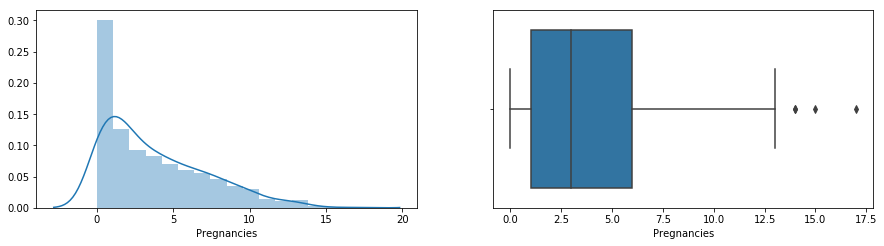

In [13]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(A["Pregnancies"])

plt.subplot(222)
sns.boxplot(A["Pregnancies"])

No. of pregnanices is highly skewed figure, and a lot of outliers are also present

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


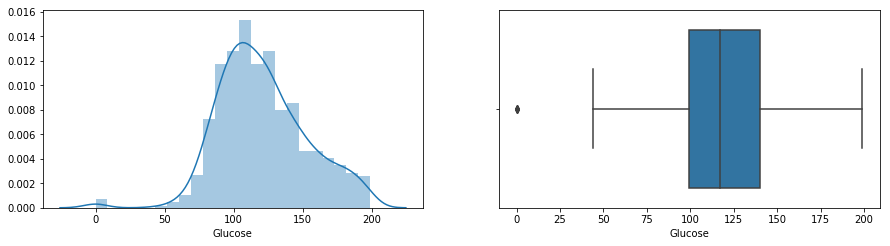

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(A["Glucose"])

plt.subplot(222)
sns.boxplot(A["Glucose"])

This Variable is skewed but not on a high level 

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


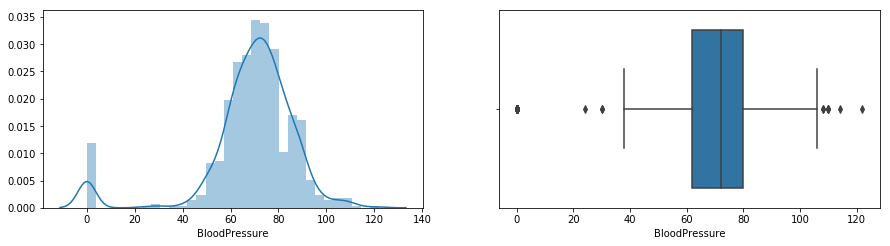

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(A["BloodPressure"])

plt.subplot(222)
sns.boxplot(A["BloodPressure"])

This variable is also not highly skewed but there are some outliers present towards the left side of the boxplot.

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


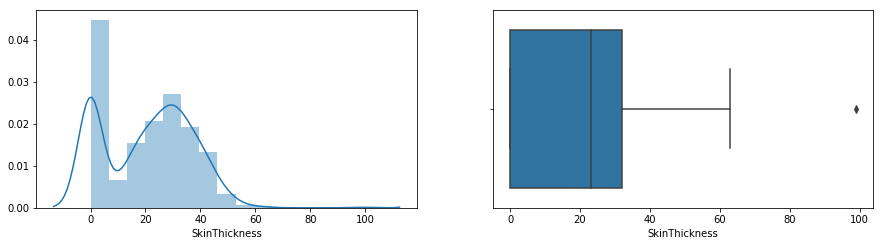

In [16]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(A["SkinThickness"])

plt.subplot(222)
sns.boxplot(A["SkinThickness"])

This Variable is highly skewed

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


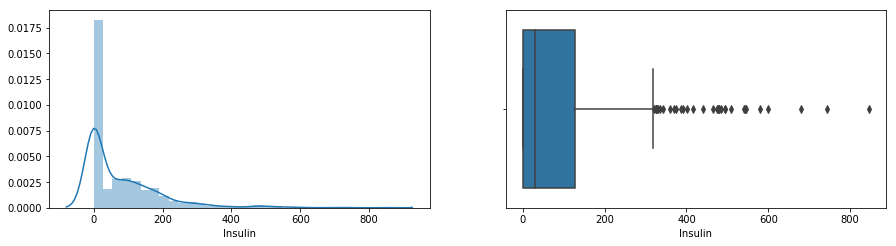

In [18]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(A["Insulin"])

plt.subplot(222)
sns.boxplot(A["Insulin"])

Insulin data is highly skewed.

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


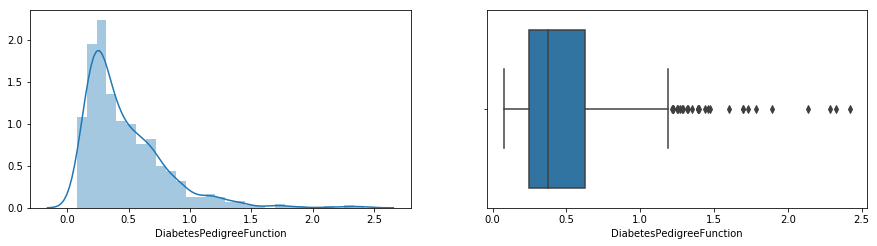

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(A["DiabetesPedigreeFunction"])

plt.subplot(222)
sns.boxplot(A["DiabetesPedigreeFunction"])

The data is highly right skewed

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


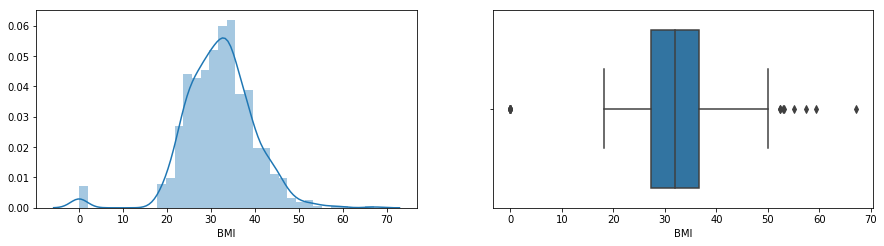

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(221)

sns.distplot(A["BMI"])

plt.subplot(222)
sns.boxplot(A["BMI"])

The data is not skewed but some outliers are present on the left

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


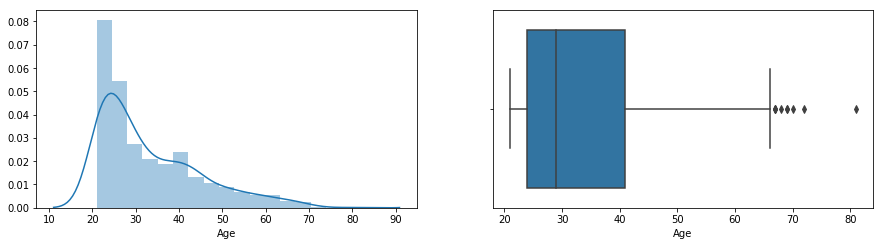

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(A["Age"])

plt.subplot(222)
sns.boxplot(A["Age"])

The data is highly right skewed

### Bivariate Analysis

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


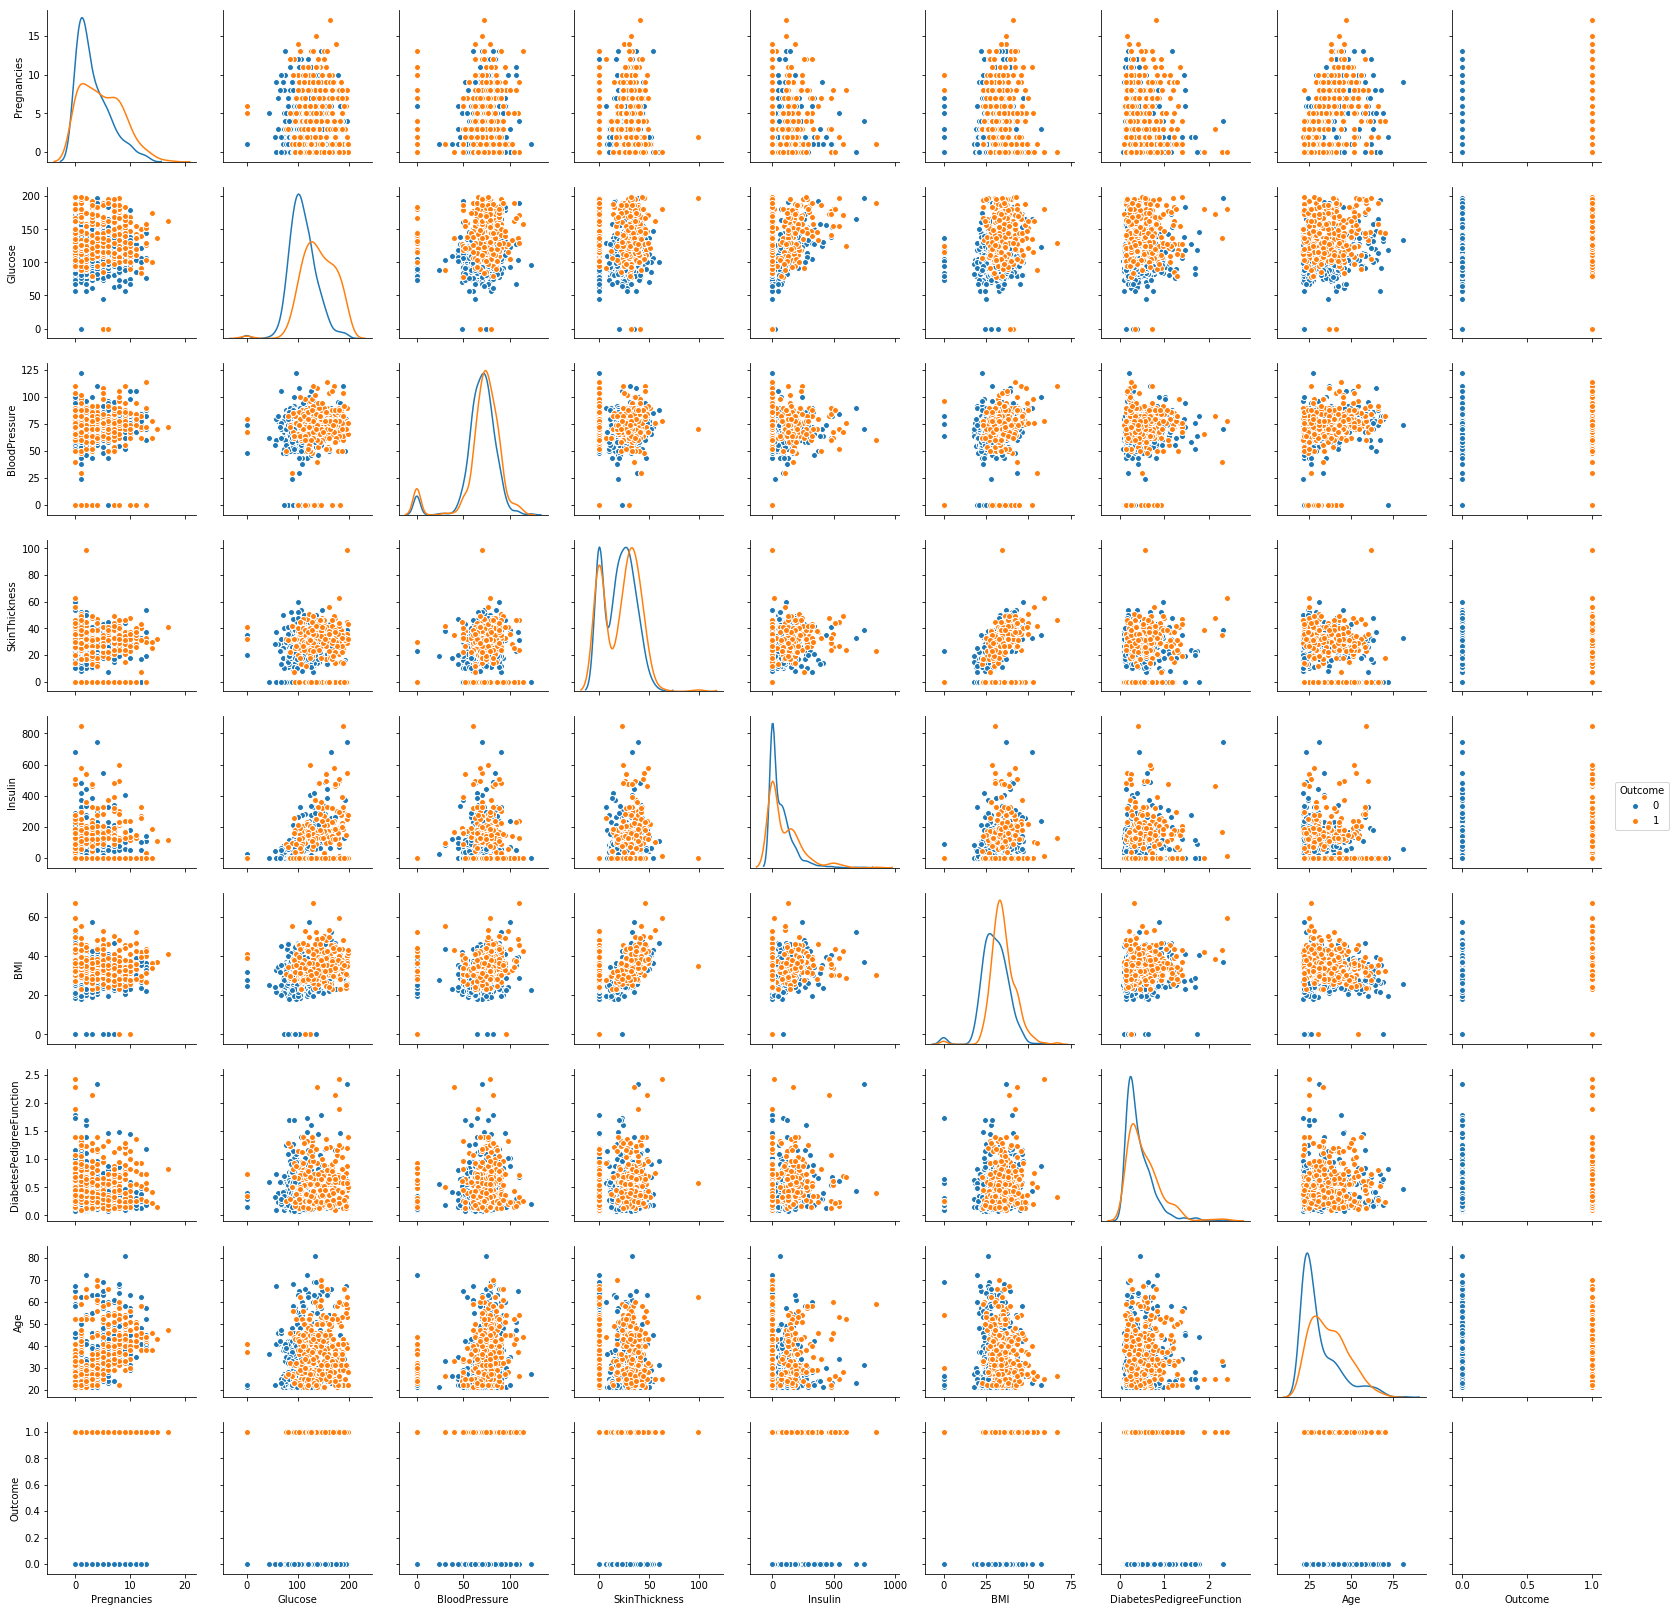

In [23]:
sns.pairplot(data=A, diag_kind="kde", hue="Outcome")

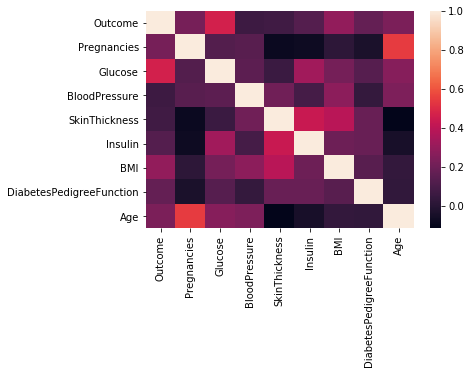

In [192]:
sns.heatmap(A.corr())

### Outlier Treatment

In [26]:
quartiles=A.describe(percentiles=[.003,.01,.25,.50,.75,.99,.997]).T
quartiles

,count,mean,std,min,0.3%,1%,25%,50%,75%,99%,99.7%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,0.00000,1.00000,3.0000,6.00000,13.00000,14.000000,17.00
Glucose,768.0,120.894531,31.972618,0.000,0.000,57.00000,99.00000,117.0000,140.25000,196.00000,197.000000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.000,0.00000,62.00000,72.0000,80.00000,106.00000,110.000000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,0.00000,23.0000,32.00000,51.33000,58.796000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,0.00000,30.5000,127.25000,519.90000,655.920000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.000,0.00000,27.30000,32.0000,36.60000,50.75900,56.607700,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.085,0.09468,0.24375,0.3725,0.62625,1.69833,2.242549,2.42
Age,768.0,33.240885,11.760232,21.000,21.000,21.00000,24.00000,29.0000,41.00000,67.00000,69.699000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.00000,0.0000,1.00000,1.00000,1.000000,1.00


In [50]:
A.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [51]:
df= A.drop(["Outcome"], axis=1)

In [52]:
normalized_df=(df-df.mean())/df.std()

In [53]:
A= A.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'], 1)

In [54]:
A = pd.concat([A,normalized_df],axis=1)

In [55]:
A.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,0,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,0,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,1,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483


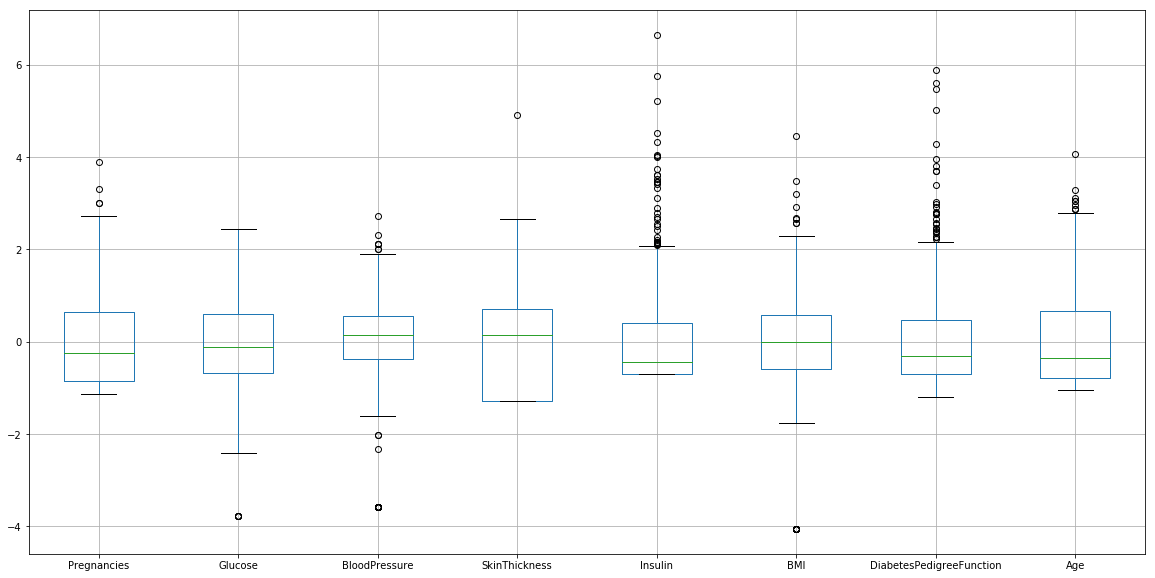

In [58]:
normalized_df.boxplot(column=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'], figsize=(20,10))

## Analysing the Target Variable

In [187]:
A["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [188]:
A["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Our data is balanced.

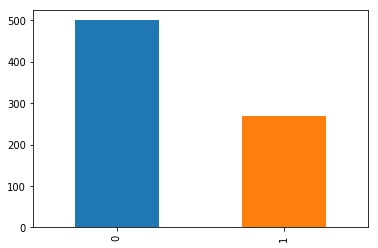

In [190]:
A["Outcome"].value_counts().plot.bar()

### Splitting data

In [60]:
A.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,0,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,0,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,1,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483


In [61]:
x=A.drop(columns="Outcome")
y=A["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123)

### Designing base Models

In [62]:
lr = LogisticRegression()
model_lr = lr.fit(x_train,y_train)
pred_lr = model_lr.predict(x_test)
metrics.accuracy_score(y_test,pred_lr)

0.7965367965367965

In [63]:
dtree = DecisionTreeClassifier()
model_dtree = dtree.fit(x_train,y_train)
pred_dtree = model_dtree.predict(x_test)
metrics.accuracy_score(y_test, pred_dtree)

0.6926406926406926

In [64]:
knn = KNeighborsClassifier()
model_knn = knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
metrics.accuracy_score(y_test, pred_knn)

0.7402597402597403

In [65]:
rf = RandomForestClassifier()
model_rf = rf.fit(x_train,y_train)
pred_rf = model_rf.predict(x_test)
metrics.accuracy_score(y_test, pred_rf)

0.7056277056277056

### Voting Classifier

In [66]:
voting_model = VotingClassifier([('lr', lr),('dtree', dtree),('knn',knn),('rf', rf)], voting='hard')
voting_model.fit(x_train, y_train)
voting_predict = voting_model.predict(x_test)
metrics.accuracy_score(y_test, voting_predict)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7662337662337663

### Dtree tuning

In [68]:
dtree_param = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2,3,4,5,6],
    'min_samples_split':[10,20,30,40,50],
    'max_features':['auto','sqrt','log2'],
    'random_state':[123]
}

grid_search = GridSearchCV(estimator=dtree, param_grid=dtree_param, cv=5)
cv_grid = grid_search.fit(x_train,y_train)
cv_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 30,
 'random_state': 123,
 'splitter': 'best'}

In [69]:
dtree_tuned = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='log2',
                               min_samples_split=30,random_state=123,splitter='best')
model_dtree_tuned = dtree_tuned.fit(x_train,y_train)
pred_dtree_tuned = model_dtree_tuned.predict(x_test)
metrics.accuracy_score(y_test, pred_dtree_tuned)

0.7316017316017316

In [70]:
rf_param = {
    'n_estimators':[200,250,300],
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=rf_param, cv=5)
cv_grid = grid_search.fit(x_train,y_train)
cv_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 300}

In [71]:
rf_tuned = RandomForestClassifier(n_estimators= 300, bootstrap= True, criterion='entropy', max_depth= 8, max_features= 'auto')
model_rf_tuned = rf_tuned.fit(x_train,y_train)
pred_rf_tuned = model_rf_tuned.predict(x_test)
metrics.accuracy_score(y_test, pred_rf_tuned)

0.7792207792207793

### Cross Validation 

In [72]:
l1 = []
for model in [lr,dtree,knn,rf_tuned]:
    Scores = cross_val_score(model, x, y, scoring='accuracy', cv=10)
    l1.append(Scores.mean())
l1

[0.7708817498291183, 0.705639097744361, 0.7382433356117566, 0.7682501708817498]

In [73]:
l2 = []
for model in [lr,dtree,knn,rf_tuned]:
    Scores = cross_val_score(model, x, y, scoring='accuracy', cv=20)
    l2.append(Scores.mean())
l2

[0.7749325236167341,
 0.6981781376518219,
 0.7436909581646425,
 0.7674089068825911]

### Boosting

The Best Models we get here is Random Forest and Logistic Regression. Now we ll apply Boosting techniques to increase accuracy.

In [74]:
adb_lr = AdaBoostClassifier(lr, n_estimators=10, learning_rate=1)
adb_lr.fit(x_train,y_train)
pred_adb_lr = adb_lr.predict(x_test)
metrics.accuracy_score(y_test,pred_adb_lr)

0.7878787878787878

In [75]:
adb_rf = AdaBoostClassifier(rf_tuned, n_estimators=10, learning_rate=1)
adb_rf.fit(x_train,y_train)
pred_adb_rf = adb_rf.predict(x_test)
metrics.accuracy_score(y_test,pred_adb_rf)

0.7792207792207793

### Cross Validation

In [79]:
l3 = []
for model in [lr,rf_tuned,adb_lr,adb_rf]:
    Scores = cross_val_score(model, x, y, scoring='accuracy', cv=20)
    l3.append(Scores.mean())
l3

[0.7749325236167341,
 0.7686234817813766,
 0.7607624831309041,
 0.7711538461538462]

### XGBoost

In [80]:
!pip install xgboost --user

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [84]:
from xgboost import XGBClassifier
xgb_lr = LogisticRegression()
modellr_xgb = xgb_lr.fit(x_train , y_train)
pred_xgb = xgb_lr.predict(x_test)
print(metrics.accuracy_score(y_test,pred_xgb))


0.7965367965367965


In [86]:
from xgboost import XGBClassifier
xgb_rf = RandomForestClassifier(n_estimators= 300, bootstrap= True, criterion='entropy', max_depth= 8, max_features= 'auto')

modelrf_xgb = xgb_rf.fit(x_train , y_train)
pred_xgb1 = xgb_rf.predict(x_test)
print(metrics.accuracy_score(y_test,pred_xgb1))


0.7748917748917749


Here, The max accuracy we are getting is by Logistic Regression and applying XG boost on it, is 79.65 %
So, for this data set our model will use Logistic Regression and XGBoost ensemble technique for maximum Likelihood.


## Question 4: Cars Data Set

### Importing Dataset


In [87]:

B = pd.read_csv('mtcars.csv')
B.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Hypothesis:cyl - Number of cylinders,Displacement (cu.in.),Gross horsepower, Rear axle ratio,Weight (1000 lbs), mile time, Engine (0 = V-shaped, 1 = straight), Transmission (0 = automatic, 1 = manual),Number of forward gears, No of Carburetors
affect the mileage of a car

### Understanding Data


In [88]:
B.shape


(32, 11)

In [89]:
B.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [90]:
B.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.8 KB


The data set is small and has zero null values.

## Univariate Analysis

In [91]:
B.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [92]:
B["cyl"].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

In [93]:
B["vs"].value_counts()

0    18
1    14
Name: vs, dtype: int64

In [94]:
B["carb"].value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [95]:
B["gear"].value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [96]:
B["am"].value_counts()


0    19
1    13
Name: am, dtype: int64

8    14
4    11
6     7
Name: cyl, dtype: int64
8    0.43750
4    0.34375
6    0.21875
Name: cyl, dtype: float64


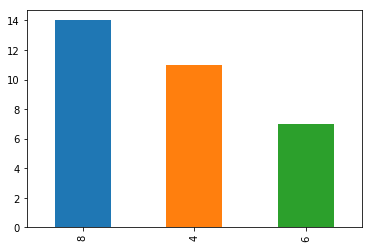

In [97]:
print(B["cyl"].value_counts())
print(B["cyl"].value_counts(normalize=True))
B["cyl"].value_counts().plot.bar()

In [98]:
B.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

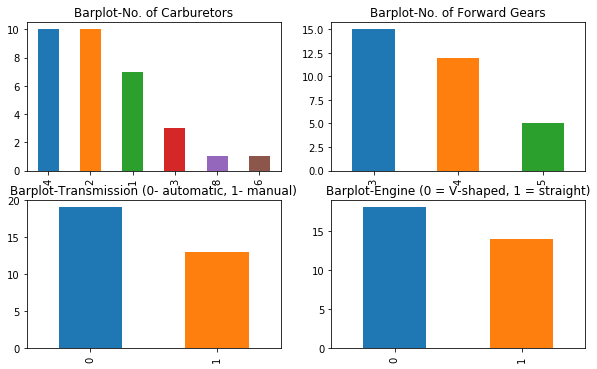

In [100]:
plt.subplot(221)
B["carb"].value_counts().plot.bar(figsize=(10,6),title="Barplot-No. of Carburetors")
plt.subplot(222)
B["gear"].value_counts().plot.bar(title="Barplot-No. of Forward Gears")
plt.subplot(223)
B["am"].value_counts().plot.bar(title="Barplot-Transmission (0- automatic, 1- manual)")
plt.subplot(224)
B["vs"].value_counts().plot.bar(title="Barplot-Engine (0 = V-shaped, 1 = straight)")

1. Cars with no. of carbuetrators as 4 and 2 are same in no. 
2. No. of forward gears as 3 is maximum
3. Automatic Transmission is more than manual
4. V shaped engines are more than straight

In [103]:
B.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462:

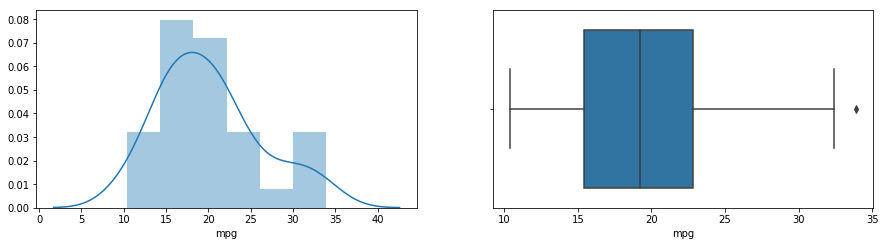

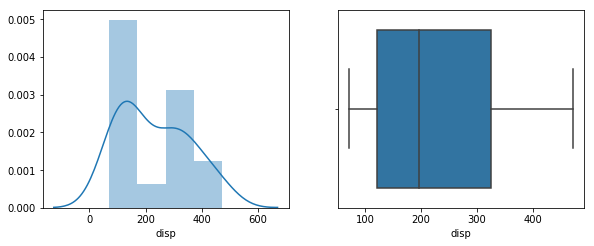

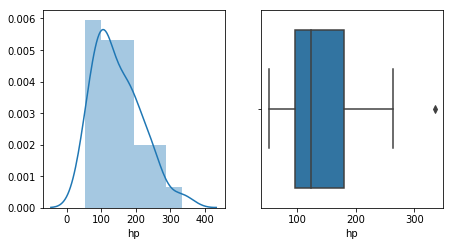

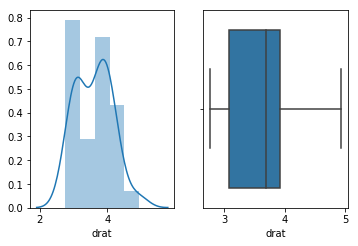

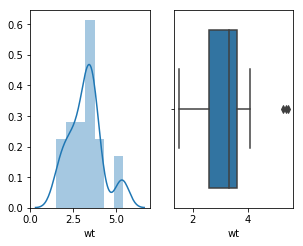

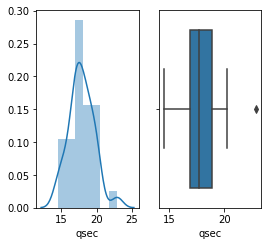

In [104]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(B["mpg"])

plt.subplot(222)
sns.boxplot(B["mpg"])

plt.figure(figsize=(15,8))
plt.subplot(231)
sns.distplot(B["disp"])

plt.subplot(232)
sns.boxplot(B["disp"])

plt.figure(figsize=(15,8))
plt.subplot(241)
sns.distplot(B["hp"])

plt.subplot(242)
sns.boxplot(B["hp"])

plt.figure(figsize=(15,8))
plt.subplot(251)
sns.distplot(B["drat"])

plt.subplot(252)
sns.boxplot(B["drat"])

plt.figure(figsize=(15,8))
plt.subplot(261)
sns.distplot(B["wt"])

plt.subplot(262)
sns.boxplot(B["wt"])

plt.figure(figsize=(15,8))
plt.subplot(271)
sns.distplot(B["qsec"])

plt.subplot(272)
sns.boxplot(B["qsec"])

## Bivariate Analysis

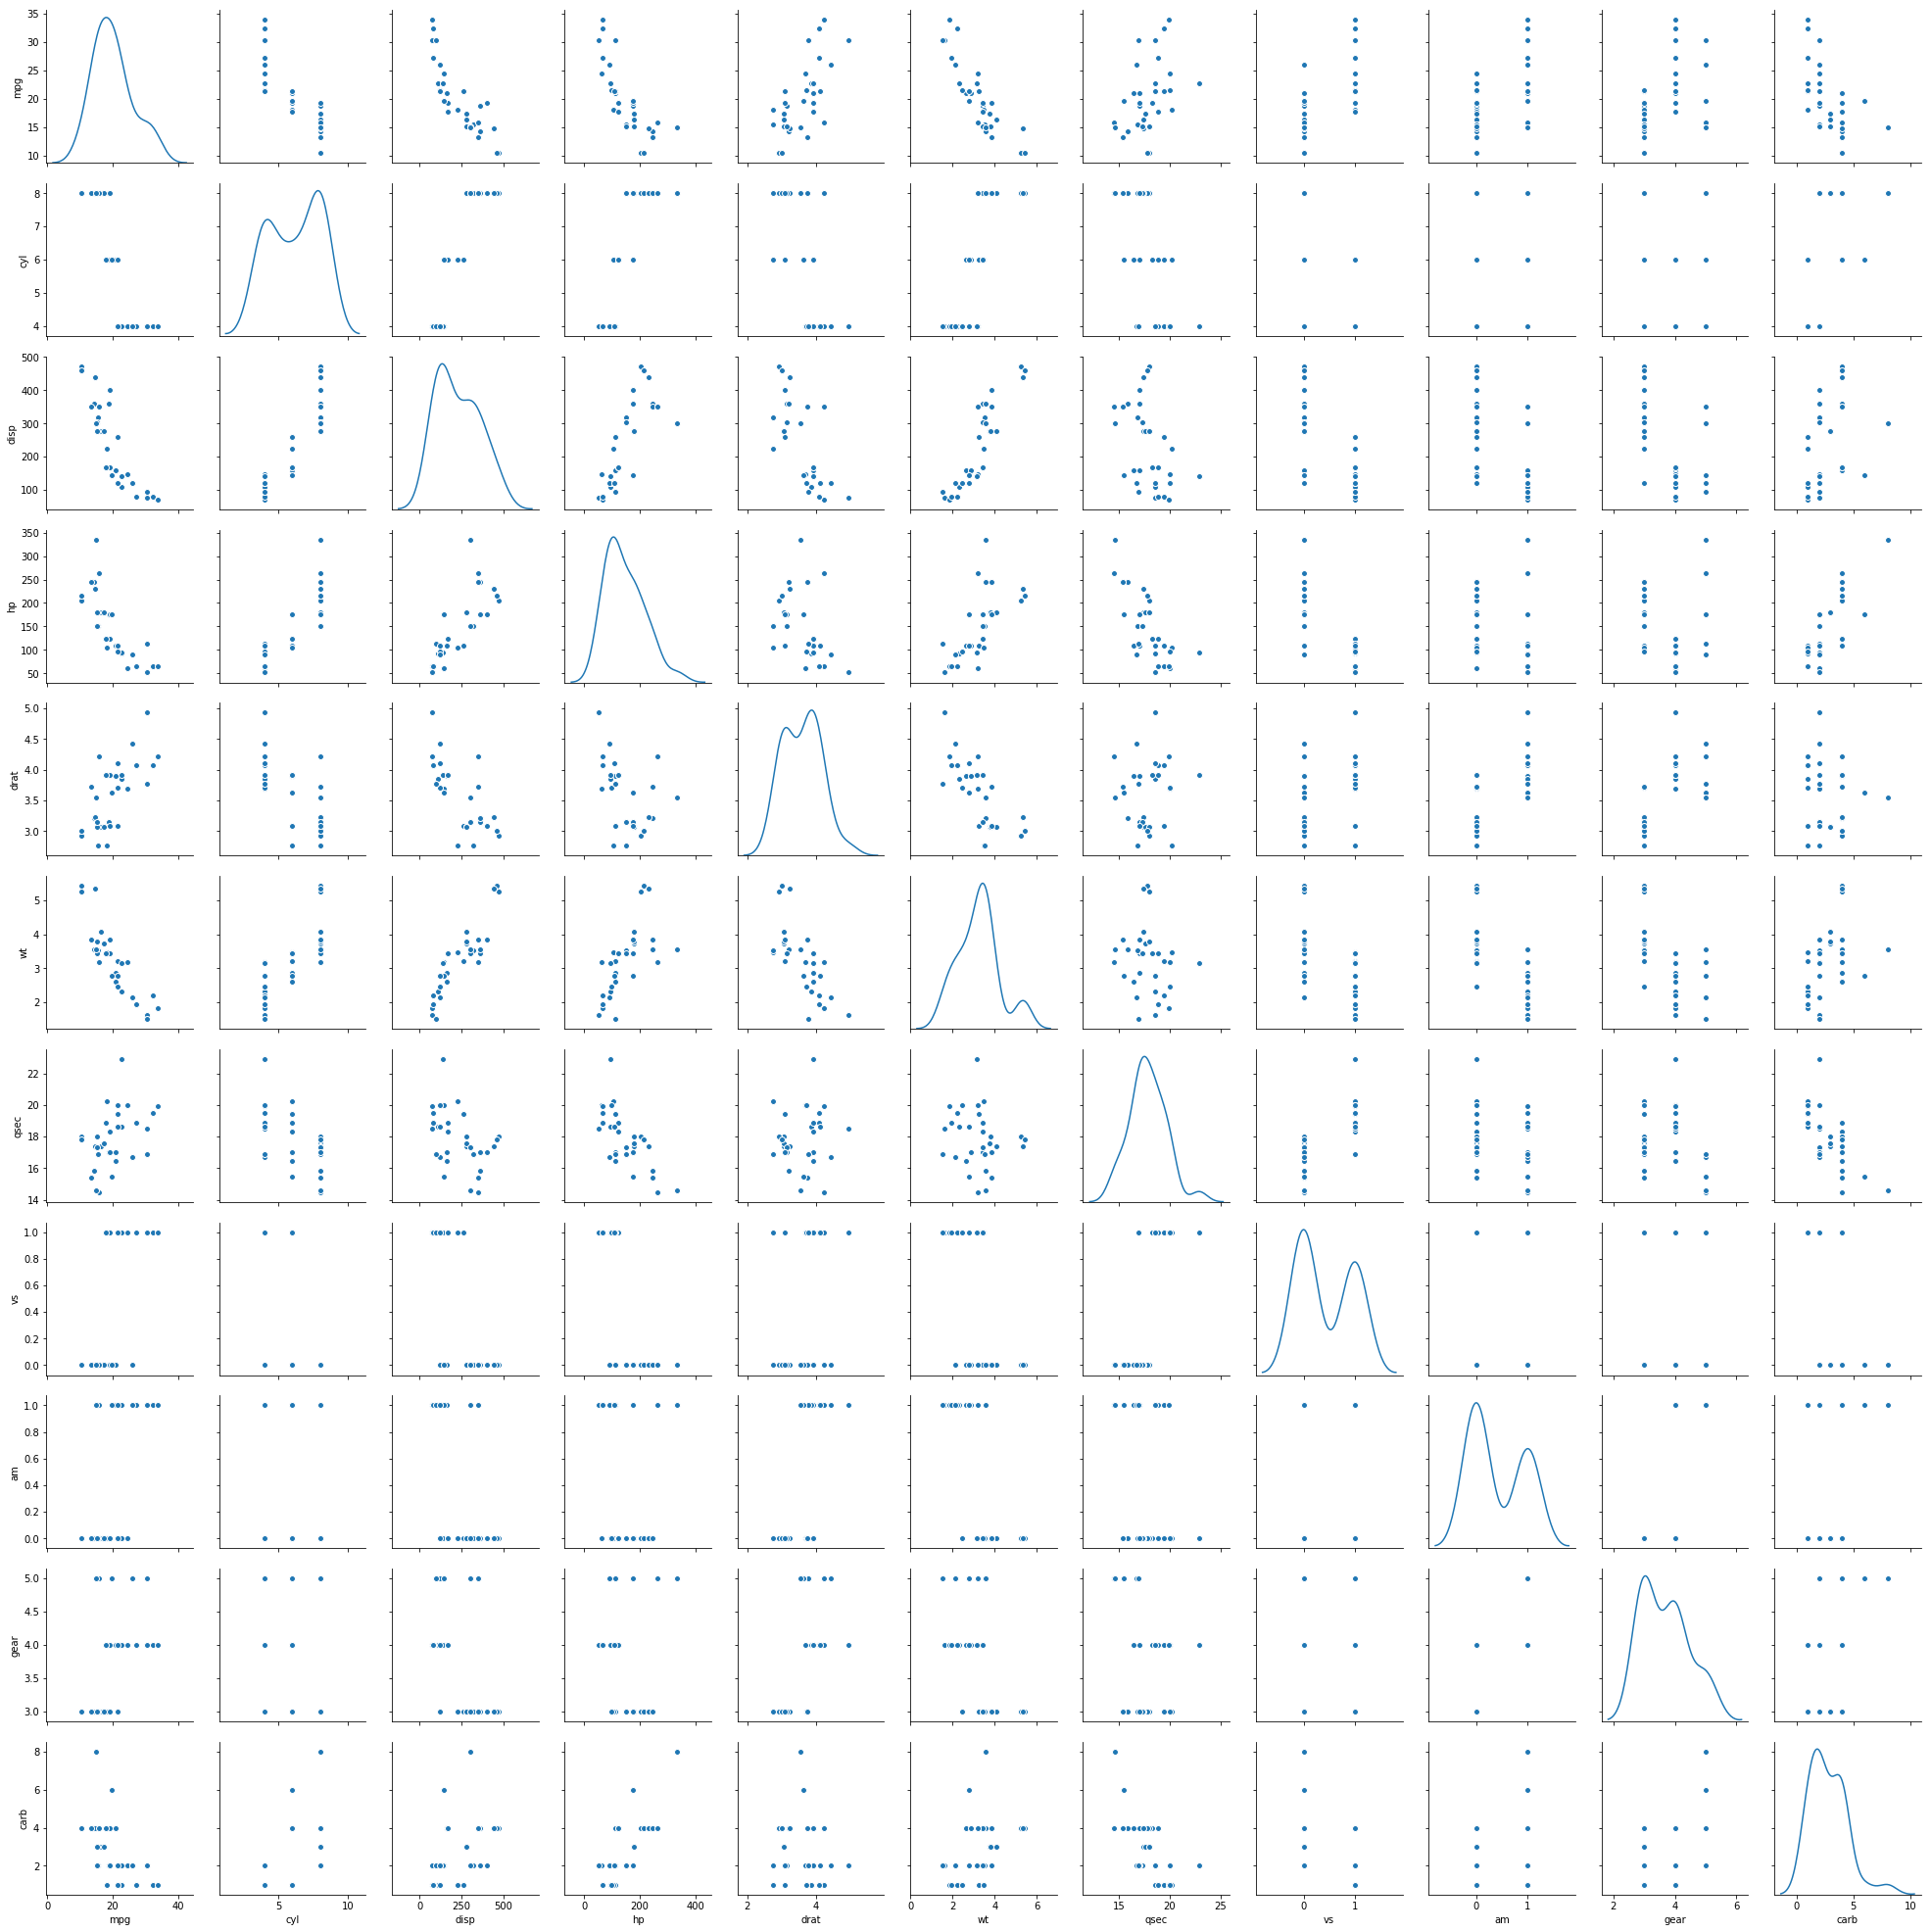

In [102]:
sns.pairplot(data=B, diag_kind= 'kde') 

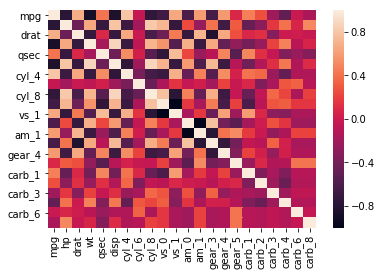

In [191]:
sns.heatmap(B.corr())

## OUTLIER TREATMENT

In [106]:
B.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [107]:
B.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [111]:
df= B[['mpg', 'hp', 'drat', 'wt', 'qsec',
       'disp']]
normalized_df=(df-df.mean())/df.std()

B= B.drop(['mpg', 'hp', 'drat', 'wt', 'qsec',
       'disp'], 1)

B = pd.concat([B,normalized_df],axis=1)

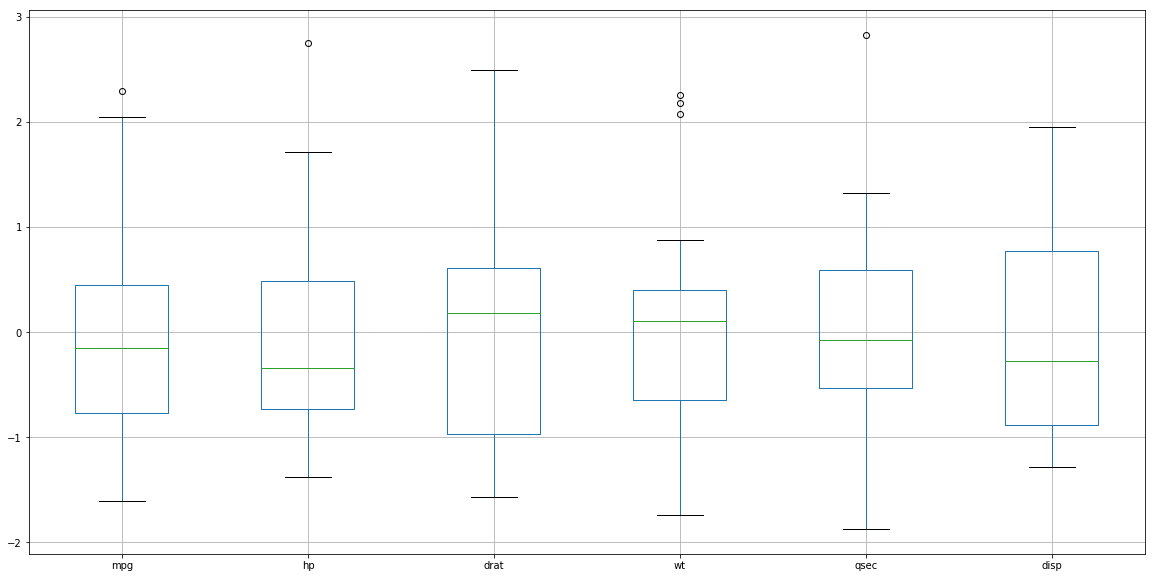

In [112]:
normalized_df.boxplot(column=['mpg', 'hp', 'drat', 'wt', 'qsec',
       'disp'], figsize=(20,10))

## Dummy Creation

In [113]:
B.columns

Index(['cyl', 'vs', 'am', 'gear', 'carb', 'mpg', 'hp', 'drat', 'wt', 'qsec',
       'disp'],
      dtype='object')

In [115]:
B = pd.get_dummies(B,columns=['cyl', 'vs', 'am', 'gear', 'carb'])


In [116]:
B.head()

,mpg,hp,drat,wt,qsec,disp,cyl_4,cyl_6,cyl_8,vs_0,...,am_1,gear_3,gear_4,gear_5,carb_1,carb_2,carb_3,carb_4,carb_6,carb_8
0,0.150885,-0.535093,0.567514,-0.610400,-0.777165,-0.570620,0,1,0,1,...,1,0,1,0,0,0,0,1,0,0
1,0.150885,-0.535093,0.567514,-0.349785,-0.463781,-0.570620,0,1,0,1,...,1,0,1,0,0,0,0,1,0,0
2,0.449543,-0.783040,0.474000,-0.917005,0.426007,-0.990182,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0
3,0.217253,-0.535093,-0.966118,-0.002300,0.890487,0.220094,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,-0.230735,0.412942,-0.835198,0.227654,-0.463781,1.043081,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0


## Splitting the data

In [122]:
x= B.drop(["mpg"], axis=1)

In [123]:
y=B["mpg"]

In [125]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=0.30, random_state=123)

In [126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


In [129]:
lr = LinearRegression()
model_lr = lr.fit(xtrain,ytrain)
pred_lr = model_lr.predict(xtest)


In [133]:
RMSE_lr = np.sqrt(np.mean((ytest-pred_lr)**2))
MAPE_lr = np.mean(np.absolute((ytest-pred_lr)/pred_lr))

RMSE_lr,MAPE_lr 


(3.4914915584661, 1.1866113403983685)

In [175]:
L = []
M = []
for i in range(1,11):
    
    df_tree =DecisionTreeRegressor(random_state=1,max_depth=i)
    df_tree = df_tree.fit(xtrain,ytrain)
    pred = df_tree.predict(xtest)
    RMSE = np.sqrt(np.mean((ytest-pred)**2))
    MAPE = np.mean(np.absolute((ytest-pred)/pred))
    L.append(RMSE)
    M.append(MAPE)

In [176]:
min_rmse = min(L)
max_dep = L.index(min_rmse)+1
print("Minimum Depth : ",max_dep)

Minimum Depth :  3


In [177]:
df_tree =DecisionTreeRegressor(random_state=1,max_depth=3)
df_tree = df_tree.fit(xtrain,ytrain)
pred = df_tree.predict(xtest)
RMSE_DT = np.sqrt(np.mean((ytest-pred)**2))
MAPE_DT = np.mean(np.absolute((ytest-pred)/pred))


In [178]:
RMSE_DT, MAPE_DT

(0.374337339539602, 0.8547424490765213)

In [179]:
rf_test_rmse = []
rf_test_mape = []
for i in range(1,9):
    rfc = RandomForestRegressor(n_estimators=500, max_features=i)
    rfc.fit(xtrain,ytrain)
    pred = rfc.predict(xtest)
    RMSE = np.sqrt(np.mean((ytest-pred)**2))
    MAPE = np.mean(np.absolute((ytest-pred)/pred))
    rf_test_rmse.append(RMSE)
    rf_test_mape.append(MAPE)

In [181]:
min_rmse_rf = min(rf_test_rmse)
max_dep = rf_test_rmse.index(min_rmse_rf) + 1
print("Minimum Depth : ",max_dep)

Minimum Depth :  8


In [182]:
rfc = RandomForestRegressor(max_features=7)
rfc.fit(xtrain,ytrain)
pred1 = rfc.predict(xtest)
RMSE_RF= np.sqrt(np.mean((ytest-pred1)**2))
MAPE_RF = np.mean(np.absolute((ytest-pred1)/pred1))

In [183]:
RMSE_RF, MAPE_RF

(0.35810486313344236, 0.75431401201279)

In [163]:
knn= KNeighborsRegressor()
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)
RMSE_knn= np.sqrt(np.mean((ytest-pred)**2))
MAPE_knn= np.mean(np.absolute((ytest-pred)/pred))

In [184]:
RMSE_knn, MAPE_knn

(0.4975386656193421, 0.39673357904336554)

## Cross Validation

In [169]:
l1 = []
for model in [lr,df_tree,knn,rfc]:
    Scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=20)
    l1.append(np.abs(Scores.mean()))

l1



[0.7134228697022318,
 0.48914009049116486,
 0.4700554867098953,
 0.43152022840125664]

Here the Least RMSE we get is in Random Forest. So we perfom Ensemble techniques on it.

In [160]:
from sklearn.ensemble import BaggingRegressor

bagg= BaggingRegressor(base_estimator=rfc,n_estimators=20, bootstrap=True, oob_score=True)
bagg

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [161]:
bagg_model= bagg.fit(xtrain, ytrain)

bagg_predict= bagg_model.predict(xtest)

RMSE_bagg = np.sqrt(np.mean((ytest-bagg_predict)**2))
MAPE_bagg = np.mean(np.absolute((ytest-bagg_predict)/bagg_predict))

RMSE_bagg, MAPE_bagg

(0.370901214446668, 0.9084396639190613)

In [162]:
from sklearn.ensemble import AdaBoostRegressor


boost= AdaBoostRegressor(base_estimator=rfc, n_estimators=20, learning_rate=1)

boost_model= boost.fit(xtrain, ytrain)

boost_predict= boost_model.predict(xtest)

RMSE_boost = np.sqrt(np.mean((ytest-boost_predict)**2))
MAPE_boost = np.mean(np.absolute((ytest-boost_predict)/boost_predict))

RMSE_boost, MAPE_boost

(0.42152867728569854, 1.3848591208464094)

In [171]:
from xgboost import XGBRegressor

In [174]:
xgb_rf = RandomForestRegressor(max_features=7, n_estimators=500)
modelrf_xgb = xgb_rf.fit(xtrain , ytrain)
pred_xgb = xgb_rf.predict(xtest)
RMSE_xgboost = np.sqrt(np.mean((ytest-pred_xgb)**2))
MAPE_xgboost = np.mean(np.absolute((ytest-pred_xgb)/pred_xgb))

RMSE_xgboost, MAPE_xgboost

(0.39270852196770206, 0.7507015474228804)

Therefore, our model we should build will be using Random Forest Regressor with XG Boost Regressor as we get the least RMSE value in this case that is 0.39